In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import ROOT
import uproot
import os
import sys
import tqdm
import pandas as pd

%jsroot on
# %matplotlib qt
%matplotlib inline

Welcome to JupyROOT 6.30/00


In [2]:
os.environ['PATH'] = '/Library/TeX/texbin:' + os.environ['PATH']
mpl.rc('font', **{'family':'serif', 'serif':['Computer Modern Roman']})
params = {'backend': 'pdf',
          'axes.labelsize': 20,
          'font.size': 20,
          'legend.fontsize': 20,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20,
          'text.usetex': True,
          'figure.figsize': (5,5),
          'axes.unicode_minus': True}
mpl.rcParams.update(params)

In [3]:
df = pd.DataFrame(columns=['radius', 
                           'number', 
                           'distance_primary_mean', 
                           'distance_primary_std', 
                           'distance_primary_sigma_1', 
                           'distance_primary_sigma_2', 
                           'distance_primary_sigma_3', 
                           'distance_initial_mean', 
                           'distance_initial_std', 
                           'distance_initial_sigma_1', 
                           'distance_initial_sigma_2', 
                           'distance_initial_sigma_3'
                          ]
                 )

# rows = [
# [0.00, 0.00, 77.89, 143.02, 40.86, 367.74, 994.26, 360.43, 527.48, 213.03, 1630.99, 2659.01],
# [3.00, 1.00, 40.25, 61.68, 27.45, 155.55, 475.80, 189.39, 262.59, 113.87, 766.67, 1760.07],
# [3.00, 2.00, 32.75, 42.05, 28.60, 108.68, 291.72, 149.26, 187.15, 126.32, 546.26, 1302.14],
# [3.00, 3.00, 30.45, 36.67, 27.84, 88.16, 259.84, 133.33, 157.21, 117.68, 430.60, 1115.10],
# [3.00, 4.00, 29.22, 33.83, 27.78, 78.71, 240.76, 124.72, 141.20, 118.20, 352.82, 1037.13],
# [3.00, 5.00, 28.04, 31.01, 27.78, 74.08, 226.87, 118.13, 129.43, 117.04, 316.15, 979.84],
# ]

rows = [
[0.00, 0.00, 77.89, 143.02, 40.86, 367.74, 994.26, 360.43, 527.48, 213.03, 1630.99, 2659.01],
[0.00, 1.00, 26.91, 31.68, 24.64, 61.60, 234.08, 112.44, 119.27, 100.16, 258.99, 973.73],
[0.00, 2.00, 23.12, 20.54, 21.28, 51.68, 152.00, 99.80, 81.96, 121.93, 175.56, 698.46],
[0.00, 3.00, 21.63, 17.74, 23.20, 46.40, 81.20, 96.77, 70.81, 130.19, 166.76, 486.77],
[0.00, 4.00, 20.21, 11.37, 21.68, 43.76, 49.52, 88.50, 71.88, 128.37, 171.52, 487.89],
[0.00, 5.00, 20.31, 10.13, 20.76, 44.84, 49.57, 68.01, 62.52, 114.33, 169.74, 192.40],
[0.00, 6.00, 18.40, 4.33, 19.92, 22.98, 23.83, 43.23, 49.16, 21.78, 160.57, 257.96],
[0.00, 7.00, 19.26, 3.61, 20.96, 22.88, 23.84, 33.67, 44.08, 19.35, 163.00, 257.96],
[0.00, 8.00, 18.98, 3.57, 20.00, 22.88, 23.84, 34.39, 45.54, 19.35, 163.00, 257.96],
[0.00, 9.00, 19.86, 2.04, 20.96, 22.96, 23.92, 22.78, 23.61, 19.35, 21.78, 257.96],
[1.00, 0.00, 77.89, 143.02, 40.86, 367.74, 994.26, 360.43, 527.48, 213.03, 1630.99, 2659.01],
[1.00, 1.00, 32.22, 43.15, 21.72, 101.36, 318.56, 141.37, 183.25, 113.87, 482.85, 1334.33],
[1.00, 2.00, 27.47, 31.42, 22.88, 68.64, 228.80, 113.08, 120.88, 100.16, 258.99, 953.88],
[1.00, 3.00, 25.44, 25.90, 22.20, 62.16, 213.12, 105.13, 98.28, 115.05, 200.66, 842.78],
[1.00, 4.00, 24.37, 22.83, 24.70, 59.28, 202.54, 100.50, 84.49, 110.46, 183.51, 792.22],
[1.00, 5.00, 23.52, 21.04, 24.70, 56.81, 185.25, 98.70, 79.05, 110.46, 171.33, 719.17],
[1.00, 6.00, 22.70, 18.76, 24.20, 53.24, 106.48, 97.06, 74.69, 110.46, 171.33, 707.00],
[1.00, 7.00, 21.90, 16.83, 22.50, 51.75, 103.50, 96.47, 72.85, 110.46, 171.33, 670.47],
[1.00, 8.00, 21.33, 15.92, 22.50, 49.50, 101.25, 96.30, 71.47, 122.63, 171.33, 621.78],
[1.00, 9.00, 20.69, 14.55, 22.89, 47.96, 83.93, 97.04, 72.93, 122.63, 171.33, 633.95],
[2.00, 0.00, 77.89, 143.02, 40.86, 367.74, 994.26, 360.43, 527.48, 213.03, 1630.99, 2659.01],
[2.00, 1.00, 36.27, 52.91, 27.45, 128.10, 411.75, 166.98, 227.67, 113.87, 653.14, 1561.39],
[2.00, 2.00, 30.51, 37.50, 28.60, 91.52, 263.12, 131.54, 156.09, 120.02, 417.82, 1132.56],
[2.00, 3.00, 28.45, 32.60, 27.84, 74.24, 236.64, 118.63, 129.00, 117.04, 310.61, 968.75],
[2.00, 4.00, 26.91, 29.07, 23.15, 69.45, 222.24, 111.47, 113.24, 116.61, 261.25, 912.15],
[2.00, 5.00, 25.89, 26.00, 22.20, 62.16, 213.12, 107.65, 104.63, 115.08, 229.26, 885.82],
[2.00, 6.00, 25.24, 24.53, 24.84, 63.48, 209.76, 105.16, 98.23, 115.08, 200.72, 857.28],
[2.00, 7.00, 24.63, 22.92, 24.20, 62.92, 188.76, 102.47, 90.94, 115.08, 186.44, 814.46],
[2.00, 8.00, 24.05, 21.44, 24.00, 60.00, 170.40, 100.54, 85.66, 110.46, 183.51, 792.22],
[2.00, 9.00, 23.62, 20.09, 24.86, 58.76, 115.26, 98.86, 81.21, 110.46, 183.51, 755.69],
[3.00, 0.00, 77.89, 143.02, 40.86, 367.74, 994.26, 360.43, 527.48, 213.03, 1630.99, 2659.01],
[3.00, 1.00, 40.25, 61.68, 27.45, 155.55, 475.80, 189.39, 262.59, 113.87, 766.67, 1760.07],
[3.00, 2.00, 32.75, 42.05, 28.60, 108.68, 291.72, 149.26, 187.15, 126.32, 546.26, 1302.14],
[3.00, 3.00, 30.45, 36.67, 27.84, 88.16, 259.84, 133.33, 157.21, 117.68, 430.60, 1115.10],
[3.00, 4.00, 29.22, 33.83, 27.78, 78.71, 240.76, 124.72, 141.20, 118.20, 352.82, 1037.13],
[3.00, 5.00, 28.04, 31.01, 27.78, 74.08, 226.87, 118.13, 129.43, 117.04, 316.15, 979.84],
[3.00, 6.00, 27.12, 28.31, 26.58, 66.45, 221.50, 112.75, 117.20, 110.94, 283.88, 928.46],
[3.00, 7.00, 26.39, 26.25, 27.90, 66.96, 214.83, 109.37, 109.82, 102.14, 246.79, 897.68],
[3.00, 8.00, 25.78, 24.79, 27.10, 65.04, 208.67, 107.28, 105.05, 102.14, 217.86, 883.22],
[3.00, 9.00, 25.32, 23.66, 26.90, 64.56, 193.68, 105.55, 99.69, 115.08, 200.72, 871.55],
[4.00, 0.00, 77.89, 143.02, 40.86, 367.74, 994.26, 360.43, 527.48, 213.03, 1630.99, 2659.01],
[4.00, 1.00, 43.61, 69.15, 21.54, 172.32, 527.73, 208.41, 292.81, 118.00, 853.37, 1941.72],
[4.00, 2.00, 34.97, 47.19, 24.21, 121.05, 322.80, 164.06, 210.98, 110.74, 618.61, 1413.52],
[4.00, 3.00, 31.85, 39.36, 28.86, 101.01, 274.17, 146.77, 179.44, 120.53, 521.17, 1222.29],
[4.00, 4.00, 30.46, 36.47, 27.84, 88.16, 255.20, 136.87, 162.50, 117.68, 469.71, 1134.66],
[4.00, 5.00, 29.58, 34.62, 27.84, 83.52, 245.92, 130.07, 151.40, 116.52, 415.29, 1095.80],
[4.00, 6.00, 28.87, 32.63, 27.06, 76.67, 234.52, 124.80, 141.62, 116.96, 365.86, 1029.59],
[4.00, 7.00, 28.08, 30.24, 26.46, 74.97, 224.91, 119.59, 132.58, 110.94, 331.04, 991.35],
[4.00, 8.00, 27.32, 28.27, 27.90, 69.75, 223.20, 114.96, 122.98, 116.61, 304.64, 941.08],
[4.00, 9.00, 26.64, 26.40, 27.60, 69.00, 212.52, 111.94, 116.68, 102.14, 275.71, 912.15],
[5.00, 0.00, 77.89, 143.02, 40.86, 367.74, 994.26, 360.43, 527.48, 213.03, 1630.99, 2659.01],
[5.00, 1.00, 47.08, 77.25, 24.10, 192.80, 578.40, 226.30, 320.78, 147.41, 941.61, 2029.96],
[5.00, 2.00, 37.12, 51.25, 24.21, 137.19, 379.29, 178.89, 235.02, 131.59, 709.09, 1549.09],
[5.00, 3.00, 33.54, 42.54, 29.22, 112.01, 292.20, 158.62, 198.75, 110.74, 596.53, 1303.12],
[5.00, 4.00, 31.86, 39.26, 29.22, 102.27, 267.85, 147.61, 180.99, 110.74, 530.28, 1236.87],
[5.00, 5.00, 30.76, 37.08, 24.35, 92.53, 253.24, 140.15, 167.79, 120.53, 481.11, 1162.19],
[5.00, 6.00, 29.99, 35.49, 24.35, 87.66, 253.24, 134.64, 158.63, 121.42, 450.07, 1124.66],
[5.00, 7.00, 29.34, 33.79, 27.06, 81.18, 239.03, 130.42, 152.06, 119.98, 409.41, 1090.42],
[5.00, 8.00, 28.71, 31.93, 26.94, 76.33, 233.48, 126.42, 145.74, 102.96, 375.36, 1056.37],
[5.00, 9.00, 28.14, 30.15, 26.64, 76.96, 227.92, 122.72, 139.78, 102.96, 358.34, 1039.35],
[6.00, 0.00, 77.89, 143.02, 40.86, 367.74, 994.26, 360.43, 527.48, 213.03, 1630.99, 2659.01],
[6.00, 1.00, 50.25, 84.47, 24.10, 204.85, 638.65, 241.46, 344.54, 147.41, 1000.44, 2147.62],
[6.00, 2.00, 39.78, 57.50, 26.97, 152.83, 431.52, 192.96, 256.56, 131.59, 787.84, 1601.59],
[6.00, 3.00, 35.41, 46.50, 28.60, 125.84, 314.60, 170.49, 217.74, 132.82, 662.77, 1391.44],
[6.00, 4.00, 33.32, 42.05, 29.70, 108.90, 287.10, 157.64, 196.79, 110.74, 596.53, 1303.12],
[6.00, 5.00, 31.90, 39.19, 29.22, 102.27, 262.98, 149.37, 183.63, 110.74, 530.28, 1258.95],
[6.00, 6.00, 31.14, 37.80, 29.22, 97.40, 258.11, 143.85, 174.61, 122.52, 509.42, 1201.78],
[6.00, 7.00, 30.44, 36.29, 24.35, 92.53, 253.24, 138.70, 165.58, 120.53, 481.11, 1142.16],
[6.00, 8.00, 29.85, 34.85, 27.84, 83.52, 245.92, 134.56, 158.77, 121.42, 450.07, 1124.66],
[6.00, 9.00, 29.31, 33.57, 27.84, 78.88, 236.64, 131.26, 153.53, 104.12, 432.77, 1090.07],
[7.00, 0.00, 77.89, 143.02, 40.86, 367.74, 994.26, 360.43, 527.48, 213.03, 1630.99, 2659.01],
[7.00, 1.00, 53.35, 91.41, 24.10, 216.90, 723.00, 255.22, 365.82, 147.41, 1059.27, 2235.87],
[7.00, 2.00, 42.22, 62.68, 31.32, 156.60, 459.36, 205.54, 276.00, 141.71, 820.28, 1696.77],
[7.00, 3.00, 37.32, 50.45, 31.64, 134.47, 340.13, 181.66, 235.28, 131.59, 709.09, 1470.34],
[7.00, 4.00, 34.82, 44.80, 31.26, 119.83, 302.18, 168.02, 212.68, 131.59, 630.34, 1365.34],
[7.00, 5.00, 33.24, 41.77, 25.85, 108.57, 279.18, 158.76, 198.78, 105.34, 604.09, 1312.84],
[7.00, 6.00, 32.36, 40.16, 29.22, 102.27, 267.85, 152.99, 189.51, 122.52, 570.51, 1262.87],
[7.00, 7.00, 31.54, 38.53, 29.22, 97.40, 262.98, 148.03, 182.06, 122.52, 529.79, 1242.50],
[7.00, 8.00, 30.89, 37.25, 29.22, 92.53, 258.11, 143.38, 174.40, 122.52, 509.42, 1201.78],
[7.00, 9.00, 30.29, 35.84, 27.84, 88.16, 245.92, 139.70, 168.84, 122.52, 489.06, 1161.05],
[8.00, 0.00, 77.89, 143.02, 40.86, 367.74, 994.26, 360.43, 527.48, 213.03, 1630.99, 2659.01],
[8.00, 1.00, 56.08, 97.22, 26.18, 235.62, 772.31, 267.58, 383.99, 163.67, 1143.65, 2286.96],
[8.00, 2.00, 44.41, 66.89, 31.32, 177.48, 480.24, 217.17, 293.67, 141.71, 876.83, 1781.59],
[8.00, 3.00, 39.35, 54.57, 24.99, 149.94, 383.18, 192.32, 250.95, 131.59, 761.59, 1522.84],
[8.00, 4.00, 36.45, 47.99, 31.26, 135.46, 323.02, 177.74, 227.34, 131.59, 682.84, 1417.84],
[8.00, 5.00, 34.53, 44.08, 31.02, 118.91, 294.69, 167.69, 212.13, 131.59, 630.34, 1365.34],
[8.00, 6.00, 33.29, 41.75, 29.22, 112.01, 277.59, 160.27, 200.97, 105.34, 604.09, 1312.84],
[8.00, 7.00, 32.50, 40.38, 29.22, 107.14, 272.72, 155.45, 194.14, 105.34, 577.84, 1286.59],
[8.00, 8.00, 31.86, 39.10, 29.22, 102.27, 262.98, 151.08, 186.74, 105.34, 551.59, 1260.34],
[8.00, 9.00, 31.29, 37.88, 29.22, 97.40, 258.11, 147.48, 181.56, 122.52, 529.79, 1242.50],
[9.00, 0.00, 77.89, 143.02, 40.86, 367.74, 994.26, 360.43, 527.48, 213.03, 1630.99, 2659.01],
[9.00, 1.00, 58.50, 101.77, 26.18, 248.71, 785.40, 278.21, 399.39, 163.67, 1176.31, 2319.62],
[9.00, 2.00, 46.56, 71.49, 23.82, 190.56, 500.22, 227.86, 310.29, 141.71, 933.38, 1866.41],
[9.00, 3.00, 41.15, 57.84, 33.32, 158.27, 408.17, 202.27, 266.24, 131.59, 814.09, 1601.59],
[9.00, 4.00, 38.13, 51.15, 30.70, 141.22, 343.84, 187.01, 240.44, 131.59, 735.34, 1444.09],
[9.00, 5.00, 35.94, 46.77, 31.14, 129.75, 316.59, 176.45, 224.91, 131.59, 682.84, 1391.59],
[9.00, 6.00, 34.57, 44.14, 31.02, 118.91, 294.69, 168.42, 213.03, 131.59, 630.34, 1365.34],
[9.00, 7.00, 33.49, 42.17, 30.48, 111.76, 279.40, 162.40, 204.23, 105.34, 604.09, 1339.09],
[9.00, 8.00, 32.69, 40.47, 29.22, 107.14, 267.85, 157.73, 197.16, 105.34, 577.84, 1312.84],
[9.00, 9.00, 32.05, 39.32, 29.22, 102.27, 262.98, 153.86, 191.66, 105.34, 577.84, 1286.59]
]

for row in rows:
    df.loc[len(df)] = row

In [41]:
results = """
100%|██████████| 55354/55354 [00:33<00:00, 1630.19it/s]
100%|██████████| 55354/55354 [00:00<00:00, 80032.15it/s]
100%|██████████| 42933/42933 [00:00<00:00, 79967.48it/s]
100%|██████████| 42933/42933 [00:00<00:00, 80564.96it/s]
100%|██████████| 42933/42933 [01:58<00:00, 363.44it/s]
[0.00, 0.00, 77.89, 143.02, 40.86, 367.74, 994.26, 360.43, 527.48, 213.03, 1630.99, 2659.01]
100%|██████████| 55354/55354 [00:34<00:00, 1609.97it/s]
100%|██████████| 15677/15677 [00:00<00:00, 80052.14it/s]
100%|██████████| 10654/10654 [00:00<00:00, 78403.30it/s]
100%|██████████| 10654/10654 [00:00<00:00, 79845.97it/s]
100%|██████████| 10654/10654 [00:29<00:00, 359.82it/s]
[0.00, 1.00, 26.91, 31.68, 24.64, 61.60, 234.08, 112.44, 119.27, 100.16, 258.99, 973.73]
100%|██████████| 55354/55354 [00:35<00:00, 1572.92it/s]
100%|██████████| 7511/7511 [00:00<00:00, 73230.21it/s]
100%|██████████| 4067/4067 [00:00<00:00, 75434.85it/s]
100%|██████████| 4067/4067 [00:00<00:00, 77033.56it/s]
100%|██████████| 4067/4067 [00:10<00:00, 374.59it/s]
[0.00, 2.00, 23.12, 20.54, 21.28, 51.68, 152.00, 99.80, 81.96, 121.93, 175.56, 698.46]
100%|██████████| 55354/55354 [00:34<00:00, 1603.17it/s]
100%|██████████| 4145/4145 [00:00<00:00, 79392.59it/s]
100%|██████████| 1425/1425 [00:00<00:00, 79876.02it/s]
100%|██████████| 1425/1425 [00:00<00:00, 77648.08it/s]
100%|██████████| 1425/1425 [00:04<00:00, 354.25it/s]
[0.00, 3.00, 21.63, 17.74, 23.20, 46.40, 81.20, 96.77, 70.81, 130.19, 166.76, 486.77]
100%|██████████| 55354/55354 [00:35<00:00, 1578.79it/s]
100%|██████████| 2657/2657 [00:00<00:00, 79138.94it/s]
100%|██████████| 510/510 [00:00<00:00, 76165.04it/s]
100%|██████████| 510/510 [00:00<00:00, 81430.39it/s]
100%|██████████| 510/510 [00:01<00:00, 359.82it/s]
[0.00, 4.00, 20.21, 11.37, 21.68, 43.76, 49.52, 88.50, 71.88, 128.37, 171.52, 487.89]
100%|██████████| 55354/55354 [00:34<00:00, 1591.43it/s]
100%|██████████| 1987/1987 [00:00<00:00, 78624.16it/s]
100%|██████████| 210/210 [00:00<00:00, 77713.41it/s]
100%|██████████| 210/210 [00:00<00:00, 74783.82it/s]
100%|██████████| 210/210 [00:00<00:00, 381.39it/s]
[0.00, 5.00, 20.31, 10.13, 20.76, 44.84, 49.57, 68.01, 62.52, 114.33, 169.74, 192.40]
100%|██████████| 55354/55354 [00:34<00:00, 1609.61it/s]
100%|██████████| 1591/1591 [00:00<00:00, 77034.78it/s]
100%|██████████| 138/138 [00:00<00:00, 71273.73it/s]
100%|██████████| 138/138 [00:00<00:00, 76119.67it/s]
100%|██████████| 138/138 [00:00<00:00, 373.30it/s]
[0.00, 6.00, 18.40, 4.33, 19.92, 22.98, 23.83, 43.23, 49.16, 21.78, 160.57, 257.96]
100%|██████████| 55354/55354 [00:34<00:00, 1612.87it/s]
100%|██████████| 1353/1353 [00:00<00:00, 78370.60it/s]
100%|██████████| 120/120 [00:00<00:00, 71301.39it/s]
100%|██████████| 120/120 [00:00<00:00, 74082.50it/s]
100%|██████████| 120/120 [00:00<00:00, 246.83it/s]
[0.00, 7.00, 19.26, 3.61, 20.96, 22.88, 23.84, 33.67, 44.08, 19.35, 163.00, 257.96]
100%|██████████| 55354/55354 [00:34<00:00, 1594.63it/s]
100%|██████████| 1017/1017 [00:00<00:00, 78849.63it/s]
100%|██████████| 112/112 [00:00<00:00, 67923.95it/s]
100%|██████████| 112/112 [00:00<00:00, 70524.25it/s]
100%|██████████| 112/112 [00:00<00:00, 246.69it/s]
[0.00, 8.00, 18.98, 3.57, 20.00, 22.88, 23.84, 34.39, 45.54, 19.35, 163.00, 257.96]
100%|██████████| 55354/55354 [00:34<00:00, 1617.61it/s]
100%|██████████| 864/864 [00:00<00:00, 79361.38it/s]
100%|██████████| 103/103 [00:00<00:00, 72170.62it/s]
100%|██████████| 103/103 [00:00<00:00, 77784.18it/s]
100%|██████████| 103/103 [00:00<00:00, 347.61it/s]
[0.00, 9.00, 19.86, 2.04, 20.96, 22.96, 23.92, 22.78, 23.61, 19.35, 21.78, 257.96]
100%|██████████| 55354/55354 [00:34<00:00, 1622.49it/s]
100%|██████████| 55354/55354 [00:00<00:00, 79678.36it/s]
100%|██████████| 42933/42933 [00:00<00:00, 79066.89it/s]
100%|██████████| 42933/42933 [00:00<00:00, 79597.36it/s]
100%|██████████| 42933/42933 [02:06<00:00, 339.69it/s]
[1.00, 0.00, 77.89, 143.02, 40.86, 367.74, 994.26, 360.43, 527.48, 213.03, 1630.99, 2659.01]
100%|██████████| 55354/55354 [00:35<00:00, 1578.47it/s]
100%|██████████| 33708/33708 [00:00<00:00, 80528.21it/s]
100%|██████████| 25683/25683 [00:00<00:00, 78739.95it/s]
100%|██████████| 25683/25683 [00:00<00:00, 80467.31it/s]
100%|██████████| 25683/25683 [01:12<00:00, 354.63it/s]
[1.00, 1.00, 32.22, 43.15, 21.72, 101.36, 318.56, 141.37, 183.25, 113.87, 482.85, 1334.33]
100%|██████████| 55354/55354 [00:34<00:00, 1607.19it/s]
100%|██████████| 25672/25672 [00:00<00:00, 79678.74it/s]
100%|██████████| 19112/19112 [00:00<00:00, 79711.41it/s]
100%|██████████| 19112/19112 [00:00<00:00, 80708.82it/s]
100%|██████████| 19112/19112 [00:57<00:00, 333.40it/s]
[1.00, 2.00, 27.47, 31.42, 22.88, 68.64, 228.80, 113.08, 120.88, 100.16, 258.99, 953.88]
100%|██████████| 55354/55354 [00:33<00:00, 1637.02it/s]
100%|██████████| 21473/21473 [00:00<00:00, 80973.99it/s]
100%|██████████| 15683/15683 [00:00<00:00, 79945.54it/s]
100%|██████████| 15683/15683 [00:00<00:00, 82066.52it/s]
100%|██████████| 15683/15683 [00:44<00:00, 352.71it/s]
[1.00, 3.00, 25.44, 25.90, 22.20, 62.16, 213.12, 105.13, 98.28, 115.05, 200.66, 842.78]
100%|██████████| 55354/55354 [00:33<00:00, 1632.19it/s]
100%|██████████| 18712/18712 [00:00<00:00, 81753.21it/s]
100%|██████████| 13403/13403 [00:00<00:00, 79394.99it/s]
100%|██████████| 13403/13403 [00:00<00:00, 78901.12it/s]
100%|██████████| 13403/13403 [00:38<00:00, 346.31it/s]
[1.00, 4.00, 24.37, 22.83, 24.70, 59.28, 202.54, 100.50, 84.49, 110.46, 183.51, 792.22]
100%|██████████| 55354/55354 [00:34<00:00, 1602.34it/s]
100%|██████████| 16721/16721 [00:00<00:00, 79769.33it/s]
100%|██████████| 11822/11822 [00:00<00:00, 79239.24it/s]
100%|██████████| 11822/11822 [00:00<00:00, 78994.97it/s]
100%|██████████| 11822/11822 [09:46<00:00, 20.15it/s] 
[1.00, 5.00, 23.52, 21.04, 24.70, 56.81, 185.25, 98.70, 79.05, 110.46, 171.33, 719.17]
100%|██████████| 55354/55354 [04:06<00:00, 225.00it/s] 
100%|██████████| 15035/15035 [00:00<00:00, 81183.98it/s]
100%|██████████| 10496/10496 [00:00<00:00, 78385.08it/s]
100%|██████████| 10496/10496 [00:00<00:00, 81999.99it/s]
100%|██████████| 10496/10496 [00:26<00:00, 400.49it/s]
[1.00, 6.00, 22.70, 18.76, 24.20, 53.24, 106.48, 97.06, 74.69, 110.46, 171.33, 707.00]
100%|██████████| 55354/55354 [00:33<00:00, 1635.53it/s]
100%|██████████| 13356/13356 [00:00<00:00, 81451.91it/s]
100%|██████████| 9133/9133 [00:00<00:00, 80338.62it/s]
100%|██████████| 9133/9133 [00:00<00:00, 81123.97it/s]
100%|██████████| 9133/9133 [00:21<00:00, 422.32it/s]
[1.00, 7.00, 21.90, 16.83, 22.50, 51.75, 103.50, 96.47, 72.85, 110.46, 171.33, 670.47]
100%|██████████| 55354/55354 [00:33<00:00, 1649.56it/s]
100%|██████████| 11796/11796 [00:00<00:00, 81229.66it/s]
100%|██████████| 7886/7886 [00:00<00:00, 79845.99it/s]
100%|██████████| 7886/7886 [00:00<00:00, 81528.51it/s]
100%|██████████| 7886/7886 [00:19<00:00, 410.24it/s]
[1.00, 8.00, 21.33, 15.92, 22.50, 49.50, 101.25, 96.30, 71.47, 122.63, 171.33, 621.78]
100%|██████████| 55354/55354 [00:34<00:00, 1616.87it/s]
100%|██████████| 10330/10330 [00:00<00:00, 81411.12it/s]
100%|██████████| 6708/6708 [00:00<00:00, 79918.06it/s]
100%|██████████| 6708/6708 [00:00<00:00, 81849.13it/s]
100%|██████████| 6708/6708 [00:19<00:00, 349.83it/s]
[1.00, 9.00, 20.69, 14.55, 22.89, 47.96, 83.93, 97.04, 72.93, 122.63, 171.33, 633.95]
100%|██████████| 55354/55354 [00:34<00:00, 1608.87it/s]
100%|██████████| 55354/55354 [00:00<00:00, 81758.22it/s]
100%|██████████| 42933/42933 [00:00<00:00, 80520.11it/s]
100%|██████████| 42933/42933 [00:00<00:00, 82033.29it/s]
100%|██████████| 42933/42933 [01:54<00:00, 374.61it/s]
[2.00, 0.00, 77.89, 143.02, 40.86, 367.74, 994.26, 360.43, 527.48, 213.03, 1630.99, 2659.01]
100%|██████████| 55354/55354 [00:34<00:00, 1626.31it/s]
100%|██████████| 40991/40991 [00:00<00:00, 80591.64it/s]
100%|██████████| 31710/31710 [00:00<00:00, 80392.03it/s]
100%|██████████| 31710/31710 [00:00<00:00, 80973.88it/s]
100%|██████████| 31710/31710 [01:34<00:00, 336.73it/s]
[2.00, 1.00, 36.27, 52.91, 27.45, 128.10, 411.75, 166.98, 227.67, 113.87, 653.14, 1561.39]
100%|██████████| 55354/55354 [00:34<00:00, 1621.98it/s]
100%|██████████| 34605/34605 [00:00<00:00, 80784.68it/s]
100%|██████████| 26564/26564 [00:00<00:00, 80497.98it/s]
100%|██████████| 26564/26564 [00:00<00:00, 81790.75it/s]
100%|██████████| 26564/26564 [01:18<00:00, 338.70it/s]
[2.00, 2.00, 30.51, 37.50, 28.60, 91.52, 263.12, 131.54, 156.09, 120.02, 417.82, 1132.56]
100%|██████████| 55354/55354 [00:34<00:00, 1624.41it/s]
100%|██████████| 30102/30102 [00:00<00:00, 81415.91it/s]
100%|██████████| 22931/22931 [00:00<00:00, 79908.20it/s]
100%|██████████| 22931/22931 [00:00<00:00, 80773.36it/s]
100%|██████████| 22931/22931 [01:19<00:00, 288.45it/s]
[2.00, 3.00, 28.45, 32.60, 27.84, 74.24, 236.64, 118.63, 129.00, 117.04, 310.61, 968.75]
100%|██████████| 55354/55354 [00:34<00:00, 1602.80it/s]
100%|██████████| 26882/26882 [00:00<00:00, 80199.28it/s]
100%|██████████| 20229/20229 [00:00<00:00, 78302.01it/s]
100%|██████████| 20229/20229 [00:00<00:00, 82052.92it/s]
100%|██████████| 20229/20229 [00:54<00:00, 372.40it/s]
[2.00, 4.00, 26.91, 29.07, 23.15, 69.45, 222.24, 111.47, 113.24, 116.61, 261.25, 912.15]
100%|██████████| 55354/55354 [00:34<00:00, 1615.93it/s]
100%|██████████| 24542/24542 [00:00<00:00, 79120.78it/s]
100%|██████████| 18276/18276 [00:00<00:00, 77689.93it/s]
100%|██████████| 18276/18276 [00:00<00:00, 78503.79it/s]
100%|██████████| 18276/18276 [00:48<00:00, 379.58it/s]
[2.00, 5.00, 25.89, 26.00, 22.20, 62.16, 213.12, 107.65, 104.63, 115.08, 229.26, 885.82]
100%|██████████| 55354/55354 [00:34<00:00, 1616.86it/s]
100%|██████████| 22753/22753 [00:00<00:00, 78050.08it/s]
100%|██████████| 16779/16779 [00:00<00:00, 76736.95it/s]
100%|██████████| 16779/16779 [00:00<00:00, 79588.07it/s]
100%|██████████| 16779/16779 [00:46<00:00, 362.18it/s]
[2.00, 6.00, 25.24, 24.53, 24.84, 63.48, 209.76, 105.16, 98.23, 115.08, 200.72, 857.28]
100%|██████████| 55354/55354 [00:34<00:00, 1594.96it/s]
100%|██████████| 21393/21393 [00:00<00:00, 81722.92it/s]
100%|██████████| 15676/15676 [00:00<00:00, 81397.02it/s]
100%|██████████| 15676/15676 [00:00<00:00, 82278.92it/s]
100%|██████████| 15676/15676 [00:43<00:00, 360.41it/s]
[2.00, 7.00, 24.63, 22.92, 24.20, 62.92, 188.76, 102.47, 90.94, 115.08, 186.44, 814.46]
100%|██████████| 55354/55354 [00:37<00:00, 1472.06it/s]
100%|██████████| 20306/20306 [00:00<00:00, 78968.39it/s]
100%|██████████| 14812/14812 [00:00<00:00, 76806.24it/s]
100%|██████████| 14812/14812 [00:00<00:00, 75340.72it/s]
100%|██████████| 14812/14812 [01:27<00:00, 169.73it/s]
[2.00, 8.00, 24.05, 21.44, 24.00, 60.00, 170.40, 100.54, 85.66, 110.46, 183.51, 792.22]
100%|██████████| 55354/55354 [30:31<00:00, 30.22it/s]   
100%|██████████| 19356/19356 [00:00<00:00, 83312.50it/s]
100%|██████████| 14062/14062 [00:00<00:00, 82996.50it/s]
100%|██████████| 14062/14062 [00:00<00:00, 83271.17it/s]
100%|██████████| 14062/14062 [14:08<00:00, 16.57it/s]  
[2.00, 9.00, 23.62, 20.09, 24.86, 58.76, 115.26, 98.86, 81.21, 110.46, 183.51, 755.69]
100%|██████████| 55354/55354 [00:34<00:00, 1626.73it/s]
100%|██████████| 55354/55354 [00:00<00:00, 80618.83it/s]
100%|██████████| 42933/42933 [00:00<00:00, 79932.02it/s]
100%|██████████| 42933/42933 [00:00<00:00, 81375.06it/s]
100%|██████████| 42933/42933 [02:03<00:00, 348.91it/s]
[3.00, 0.00, 77.89, 143.02, 40.86, 367.74, 994.26, 360.43, 527.48, 213.03, 1630.99, 2659.01]
100%|██████████| 55354/55354 [00:34<00:00, 1594.37it/s]
100%|██████████| 44826/44826 [00:00<00:00, 78875.14it/s]
100%|██████████| 34807/34807 [00:00<00:00, 78151.62it/s]
100%|██████████| 34807/34807 [00:00<00:00, 80758.17it/s]
100%|██████████| 34807/34807 [02:00<00:00, 289.73it/s]
[3.00, 1.00, 40.25, 61.68, 27.45, 155.55, 475.80, 189.39, 262.59, 113.87, 766.67, 1760.07]
100%|██████████| 55354/55354 [00:34<00:00, 1603.67it/s]
100%|██████████| 39914/39914 [00:00<00:00, 80788.06it/s]
100%|██████████| 31000/31000 [00:00<00:00, 79271.31it/s]
100%|██████████| 31000/31000 [00:00<00:00, 81225.96it/s]
100%|██████████| 31000/31000 [02:03<00:00, 251.12it/s]
[3.00, 2.00, 32.75, 42.05, 28.60, 108.68, 291.72, 149.26, 187.15, 126.32, 546.26, 1302.14]
100%|██████████| 55354/55354 [00:34<00:00, 1612.90it/s]
100%|██████████| 36334/36334 [00:00<00:00, 77395.78it/s]
100%|██████████| 28106/28106 [00:00<00:00, 78289.08it/s]
100%|██████████| 28106/28106 [00:00<00:00, 78903.32it/s]
100%|██████████| 28106/28106 [01:34<00:00, 297.23it/s]
[3.00, 3.00, 30.45, 36.67, 27.84, 88.16, 259.84, 133.33, 157.21, 117.68, 430.60, 1115.10]
100%|██████████| 55354/55354 [00:34<00:00, 1626.63it/s]
100%|██████████| 33364/33364 [00:00<00:00, 80423.51it/s]
100%|██████████| 25721/25721 [00:00<00:00, 79923.08it/s]
100%|██████████| 25721/25721 [00:00<00:00, 81916.03it/s]
100%|██████████| 25721/25721 [01:25<00:00, 299.94it/s]
[3.00, 4.00, 29.22, 33.83, 27.78, 78.71, 240.76, 124.72, 141.20, 118.20, 352.82, 1037.13]
100%|██████████| 55354/55354 [00:35<00:00, 1562.41it/s]
100%|██████████| 30798/30798 [00:00<00:00, 79483.64it/s]
100%|██████████| 23593/23593 [00:00<00:00, 79015.28it/s]
100%|██████████| 23593/23593 [00:00<00:00, 81018.21it/s]
100%|██████████| 23593/23593 [01:49<00:00, 215.62it/s]
[3.00, 5.00, 28.04, 31.01, 27.78, 74.08, 226.87, 118.13, 129.43, 117.04, 316.15, 979.84]
100%|██████████| 55354/55354 [00:35<00:00, 1551.26it/s]
100%|██████████| 28534/28534 [00:00<00:00, 78515.01it/s]
100%|██████████| 21722/21722 [00:00<00:00, 75958.77it/s]
100%|██████████| 21722/21722 [00:00<00:00, 78691.20it/s]
100%|██████████| 21722/21722 [01:33<00:00, 231.90it/s]
[3.00, 6.00, 27.12, 28.31, 26.58, 66.45, 221.50, 112.75, 117.20, 110.94, 283.88, 928.46]
100%|██████████| 55354/55354 [00:36<00:00, 1504.28it/s]
100%|██████████| 26828/26828 [00:00<00:00, 78417.44it/s]
100%|██████████| 20269/20269 [00:00<00:00, 75951.17it/s]
100%|██████████| 20269/20269 [00:00<00:00, 74700.98it/s]
100%|██████████| 20269/20269 [01:26<00:00, 235.29it/s]
[3.00, 7.00, 26.39, 26.25, 27.90, 66.96, 214.83, 109.37, 109.82, 102.14, 246.79, 897.68]
100%|██████████| 55354/55354 [00:35<00:00, 1569.13it/s]
100%|██████████| 25368/25368 [00:00<00:00, 79068.71it/s]
100%|██████████| 19007/19007 [00:00<00:00, 78402.95it/s]
100%|██████████| 19007/19007 [00:00<00:00, 81217.16it/s]
100%|██████████| 19007/19007 [01:03<00:00, 301.26it/s]
[3.00, 8.00, 25.78, 24.79, 27.10, 65.04, 208.67, 107.28, 105.05, 102.14, 217.86, 883.22]
100%|██████████| 55354/55354 [00:35<00:00, 1559.66it/s]
100%|██████████| 24093/24093 [00:00<00:00, 75559.17it/s]
100%|██████████| 17924/17924 [00:00<00:00, 74546.99it/s]
100%|██████████| 17924/17924 [00:00<00:00, 76454.19it/s]
100%|██████████| 17924/17924 [01:01<00:00, 289.82it/s]
[3.00, 9.00, 25.32, 23.66, 26.90, 64.56, 193.68, 105.55, 99.69, 115.08, 200.72, 871.55]
100%|██████████| 55354/55354 [00:34<00:00, 1610.18it/s]
100%|██████████| 55354/55354 [00:00<00:00, 78402.55it/s]
100%|██████████| 42933/42933 [00:00<00:00, 78687.50it/s]
100%|██████████| 42933/42933 [00:00<00:00, 81712.52it/s]
100%|██████████| 42933/42933 [02:16<00:00, 313.68it/s]
[4.00, 0.00, 77.89, 143.02, 40.86, 367.74, 994.26, 360.43, 527.48, 213.03, 1630.99, 2659.01]
100%|██████████| 55354/55354 [00:34<00:00, 1619.86it/s]
100%|██████████| 46933/46933 [00:00<00:00, 80461.45it/s]
100%|██████████| 36446/36446 [00:00<00:00, 80836.32it/s]
100%|██████████| 36446/36446 [00:00<00:00, 82167.39it/s]
100%|██████████| 36446/36446 [01:54<00:00, 317.35it/s]
[4.00, 1.00, 43.61, 69.15, 21.54, 172.32, 527.73, 208.41, 292.81, 118.00, 853.37, 1941.72]
100%|██████████| 55354/55354 [00:35<00:00, 1566.17it/s]
100%|██████████| 42863/42863 [00:00<00:00, 79505.78it/s]
100%|██████████| 33353/33353 [00:00<00:00, 78075.49it/s]
100%|██████████| 33353/33353 [00:00<00:00, 79812.67it/s]
100%|██████████| 33353/33353 [01:45<00:00, 314.84it/s]
[4.00, 2.00, 34.97, 47.19, 24.21, 121.05, 322.80, 164.06, 210.98, 110.74, 618.61, 1413.52]
100%|██████████| 55354/55354 [00:34<00:00, 1608.53it/s]
100%|██████████| 40124/40124 [00:00<00:00, 80758.74it/s]
100%|██████████| 31234/31234 [00:00<00:00, 80244.19it/s]
100%|██████████| 31234/31234 [00:00<00:00, 80958.82it/s]
100%|██████████| 31234/31234 [01:40<00:00, 310.03it/s]
[4.00, 3.00, 31.85, 39.36, 28.86, 101.01, 274.17, 146.77, 179.44, 120.53, 521.17, 1222.29]
100%|██████████| 55354/55354 [00:34<00:00, 1604.77it/s]
100%|██████████| 37751/37751 [00:00<00:00, 81275.47it/s]
100%|██████████| 29368/29368 [00:00<00:00, 80874.12it/s]
100%|██████████| 29368/29368 [00:00<00:00, 80014.39it/s]
100%|██████████| 29368/29368 [01:29<00:00, 328.37it/s]
[4.00, 4.00, 30.46, 36.47, 27.84, 88.16, 255.20, 136.87, 162.50, 117.68, 469.71, 1134.66]
100%|██████████| 55354/55354 [00:34<00:00, 1604.26it/s]
100%|██████████| 35620/35620 [00:00<00:00, 79809.48it/s]
100%|██████████| 27686/27686 [00:00<00:00, 80606.22it/s]
100%|██████████| 27686/27686 [00:00<00:00, 81015.51it/s]
100%|██████████| 27686/27686 [01:23<00:00, 331.77it/s]
[4.00, 5.00, 29.58, 34.62, 27.84, 83.52, 245.92, 130.07, 151.40, 116.52, 415.29, 1095.80]
100%|██████████| 55354/55354 [00:34<00:00, 1591.47it/s]
100%|██████████| 33645/33645 [00:00<00:00, 79343.56it/s]
100%|██████████| 26137/26137 [00:00<00:00, 78453.22it/s]
100%|██████████| 26137/26137 [00:00<00:00, 82073.41it/s]
100%|██████████| 26137/26137 [01:18<00:00, 331.08it/s]
[4.00, 6.00, 28.87, 32.63, 27.06, 76.67, 234.52, 124.80, 141.62, 116.96, 365.86, 1029.59]
100%|██████████| 55354/55354 [00:34<00:00, 1622.19it/s]
100%|██████████| 31767/31767 [00:00<00:00, 79562.36it/s]
100%|██████████| 24523/24523 [00:00<00:00, 79652.17it/s]
100%|██████████| 24523/24523 [00:00<00:00, 80925.72it/s]
100%|██████████| 24523/24523 [01:19<00:00, 310.03it/s]
[4.00, 7.00, 28.08, 30.24, 26.46, 74.97, 224.91, 119.59, 132.58, 110.94, 331.04, 991.35]
100%|██████████| 55354/55354 [00:34<00:00, 1617.78it/s]
100%|██████████| 30148/30148 [00:00<00:00, 80119.29it/s]
100%|██████████| 23157/23157 [00:00<00:00, 78790.25it/s]
100%|██████████| 23157/23157 [00:00<00:00, 81096.98it/s]
100%|██████████| 23157/23157 [01:15<00:00, 306.67it/s]
[4.00, 8.00, 27.32, 28.27, 27.90, 69.75, 223.20, 114.96, 122.98, 116.61, 304.64, 941.08]
100%|██████████| 55354/55354 [00:34<00:00, 1615.81it/s]
100%|██████████| 28731/28731 [00:00<00:00, 80800.63it/s]
100%|██████████| 21972/21972 [00:00<00:00, 80075.25it/s]
100%|██████████| 21972/21972 [00:00<00:00, 79625.68it/s]
100%|██████████| 21972/21972 [01:05<00:00, 333.25it/s]
[4.00, 9.00, 26.64, 26.40, 27.60, 69.00, 212.52, 111.94, 116.68, 102.14, 275.71, 912.15]
100%|██████████| 55354/55354 [00:34<00:00, 1619.06it/s]
100%|██████████| 55354/55354 [00:00<00:00, 79552.96it/s]
100%|██████████| 42933/42933 [00:00<00:00, 79630.13it/s]
100%|██████████| 42933/42933 [00:00<00:00, 80875.78it/s]
100%|██████████| 42933/42933 [02:16<00:00, 314.20it/s]
[5.00, 0.00, 77.89, 143.02, 40.86, 367.74, 994.26, 360.43, 527.48, 213.03, 1630.99, 2659.01]
100%|██████████| 55354/55354 [00:34<00:00, 1587.33it/s]
100%|██████████| 48377/48377 [00:00<00:00, 80424.58it/s]
100%|██████████| 37609/37609 [00:00<00:00, 80357.64it/s]
100%|██████████| 37609/37609 [00:00<00:00, 81584.35it/s]
100%|██████████| 37609/37609 [01:43<00:00, 363.93it/s]
[5.00, 1.00, 47.08, 77.25, 24.10, 192.80, 578.40, 226.30, 320.78, 147.41, 941.61, 2029.96]
100%|██████████| 55354/55354 [00:33<00:00, 1628.80it/s]
100%|██████████| 44789/44789 [00:00<00:00, 80562.01it/s]
100%|██████████| 34874/34874 [00:00<00:00, 80314.69it/s]
100%|██████████| 34874/34874 [00:00<00:00, 80342.26it/s]
100%|██████████| 34874/34874 [01:39<00:00, 352.02it/s]
[5.00, 2.00, 37.12, 51.25, 24.21, 137.19, 379.29, 178.89, 235.02, 131.59, 709.09, 1549.09]
100%|██████████| 55354/55354 [00:33<00:00, 1629.01it/s]
100%|██████████| 42501/42501 [00:00<00:00, 80519.75it/s]
100%|██████████| 33126/33126 [00:00<00:00, 79846.69it/s]
100%|██████████| 33126/33126 [00:00<00:00, 80206.27it/s]
100%|██████████| 33126/33126 [01:34<00:00, 350.30it/s]
[5.00, 3.00, 33.54, 42.54, 29.22, 112.01, 292.20, 158.62, 198.75, 110.74, 596.53, 1303.12]
100%|██████████| 55354/55354 [00:33<00:00, 1633.57it/s]
100%|██████████| 40665/40665 [00:00<00:00, 80113.34it/s]
100%|██████████| 31739/31739 [00:00<00:00, 80618.37it/s]
100%|██████████| 31739/31739 [00:00<00:00, 81566.08it/s]
100%|██████████| 31739/31739 [01:31<00:00, 345.21it/s]
[5.00, 4.00, 31.86, 39.26, 29.22, 102.27, 267.85, 147.61, 180.99, 110.74, 530.28, 1236.87]
100%|██████████| 55354/55354 [00:33<00:00, 1631.86it/s]
100%|██████████| 38961/38961 [00:00<00:00, 80369.59it/s]
100%|██████████| 30390/30390 [00:00<00:00, 80592.12it/s]
100%|██████████| 30390/30390 [00:00<00:00, 81676.64it/s]
100%|██████████| 30390/30390 [01:28<00:00, 343.79it/s]
[5.00, 5.00, 30.76, 37.08, 24.35, 92.53, 253.24, 140.15, 167.79, 120.53, 481.11, 1162.19]
100%|██████████| 55354/55354 [00:33<00:00, 1630.25it/s]
100%|██████████| 37361/37361 [00:00<00:00, 79736.48it/s]
100%|██████████| 29151/29151 [00:00<00:00, 80358.21it/s]
100%|██████████| 29151/29151 [00:00<00:00, 81409.91it/s]
100%|██████████| 29151/29151 [01:25<00:00, 341.69it/s]
[5.00, 6.00, 29.99, 35.49, 24.35, 87.66, 253.24, 134.64, 158.63, 121.42, 450.07, 1124.66]
100%|██████████| 55354/55354 [00:34<00:00, 1606.67it/s]
100%|██████████| 35838/35838 [00:00<00:00, 81598.33it/s]
100%|██████████| 27946/27946 [00:00<00:00, 80880.71it/s]
100%|██████████| 27946/27946 [00:00<00:00, 78801.67it/s]
100%|██████████| 27946/27946 [01:25<00:00, 325.24it/s]
[5.00, 7.00, 29.34, 33.79, 27.06, 81.18, 239.03, 130.42, 152.06, 119.98, 409.41, 1090.42]
100%|██████████| 55354/55354 [00:34<00:00, 1610.22it/s]
100%|██████████| 34410/34410 [00:00<00:00, 80779.78it/s]
100%|██████████| 26824/26824 [00:00<00:00, 79540.53it/s]
100%|██████████| 26824/26824 [00:00<00:00, 79774.02it/s]
100%|██████████| 26824/26824 [01:23<00:00, 322.64it/s]
[5.00, 8.00, 28.71, 31.93, 26.94, 76.33, 233.48, 126.42, 145.74, 102.96, 375.36, 1056.37]
100%|██████████| 55354/55354 [00:34<00:00, 1598.86it/s]
100%|██████████| 33032/33032 [00:00<00:00, 80348.90it/s]
100%|██████████| 25676/25676 [00:00<00:00, 80346.53it/s]
100%|██████████| 25676/25676 [00:00<00:00, 79803.59it/s]
100%|██████████| 25676/25676 [01:20<00:00, 319.22it/s]
[5.00, 9.00, 28.14, 30.15, 26.64, 76.96, 227.92, 122.72, 139.78, 102.96, 358.34, 1039.35]
100%|██████████| 55354/55354 [00:35<00:00, 1578.66it/s]
100%|██████████| 55354/55354 [00:00<00:00, 81426.89it/s]
100%|██████████| 42933/42933 [00:00<00:00, 79486.57it/s]
100%|██████████| 42933/42933 [00:00<00:00, 81703.22it/s]
100%|██████████| 42933/42933 [02:08<00:00, 333.83it/s]
[6.00, 0.00, 77.89, 143.02, 40.86, 367.74, 994.26, 360.43, 527.48, 213.03, 1630.99, 2659.01]
100%|██████████| 55354/55354 [00:34<00:00, 1610.96it/s]
100%|██████████| 49471/49471 [00:00<00:00, 79703.59it/s]
100%|██████████| 38436/38436 [00:00<00:00, 77883.86it/s]
100%|██████████| 38436/38436 [00:00<00:00, 79744.38it/s]
100%|██████████| 38436/38436 [01:59<00:00, 322.17it/s]
[6.00, 1.00, 50.25, 84.47, 24.10, 204.85, 638.65, 241.46, 344.54, 147.41, 1000.44, 2147.62]
100%|██████████| 55354/55354 [00:33<00:00, 1629.69it/s]
100%|██████████| 46195/46195 [00:00<00:00, 79806.29it/s]
100%|██████████| 35960/35960 [00:00<00:00, 80501.14it/s]
100%|██████████| 35960/35960 [00:00<00:00, 79894.21it/s]
100%|██████████| 35960/35960 [02:00<00:00, 298.69it/s]
[6.00, 2.00, 39.78, 57.50, 26.97, 152.83, 431.52, 192.96, 256.56, 131.59, 787.84, 1601.59]
100%|██████████| 55354/55354 [00:33<00:00, 1628.68it/s]
100%|██████████| 44094/44094 [00:00<00:00, 79223.95it/s]
100%|██████████| 34367/34367 [00:00<00:00, 79922.53it/s]
100%|██████████| 34367/34367 [00:00<00:00, 80687.37it/s]
100%|██████████| 34367/34367 [01:49<00:00, 315.08it/s]
[6.00, 3.00, 35.41, 46.50, 28.60, 125.84, 314.60, 170.49, 217.74, 132.82, 662.77, 1391.44]
100%|██████████| 55354/55354 [00:33<00:00, 1632.64it/s]
100%|██████████| 42510/42510 [00:00<00:00, 81414.31it/s]
100%|██████████| 33182/33182 [00:00<00:00, 79008.69it/s]
100%|██████████| 33182/33182 [00:00<00:00, 82050.42it/s]
100%|██████████| 33182/33182 [01:34<00:00, 351.97it/s]
[6.00, 4.00, 33.32, 42.05, 29.70, 108.90, 287.10, 157.64, 196.79, 110.74, 596.53, 1303.12]
100%|██████████| 55354/55354 [00:34<00:00, 1612.79it/s]
100%|██████████| 41153/41153 [00:00<00:00, 79641.05it/s]
100%|██████████| 32151/32151 [00:00<00:00, 80186.92it/s]
100%|██████████| 32151/32151 [00:00<00:00, 82026.45it/s]
100%|██████████| 32151/32151 [01:33<00:00, 342.68it/s]
[6.00, 5.00, 31.90, 39.19, 29.22, 102.27, 262.98, 149.37, 183.63, 110.74, 530.28, 1258.95]
100%|██████████| 55354/55354 [00:33<00:00, 1632.98it/s]
100%|██████████| 39887/39887 [00:00<00:00, 81214.10it/s]
100%|██████████| 31196/31196 [00:00<00:00, 80785.54it/s]
100%|██████████| 31196/31196 [00:00<00:00, 81095.77it/s]
100%|██████████| 31196/31196 [01:35<00:00, 328.17it/s]
[6.00, 6.00, 31.14, 37.80, 29.22, 97.40, 258.11, 143.85, 174.61, 122.52, 509.42, 1201.78]
100%|██████████| 55354/55354 [00:34<00:00, 1621.09it/s]
100%|██████████| 38634/38634 [00:00<00:00, 80014.74it/s]
100%|██████████| 30200/30200 [00:00<00:00, 78925.73it/s]
100%|██████████| 30200/30200 [00:00<00:00, 80925.44it/s]
100%|██████████| 30200/30200 [01:30<00:00, 331.93it/s]
[6.00, 7.00, 30.44, 36.29, 24.35, 92.53, 253.24, 138.70, 165.58, 120.53, 481.11, 1142.16]
100%|██████████| 55354/55354 [00:34<00:00, 1609.42it/s]
100%|██████████| 37491/37491 [00:00<00:00, 80996.84it/s]
100%|██████████| 29335/29335 [00:00<00:00, 79758.23it/s]
100%|██████████| 29335/29335 [00:00<00:00, 77690.88it/s]
100%|██████████| 29335/29335 [01:31<00:00, 319.45it/s]
[6.00, 8.00, 29.85, 34.85, 27.84, 83.52, 245.92, 134.56, 158.77, 121.42, 450.07, 1124.66]
100%|██████████| 55354/55354 [00:34<00:00, 1616.84it/s]
100%|██████████| 36386/36386 [00:00<00:00, 78965.10it/s]
100%|██████████| 28462/28462 [00:00<00:00, 79253.97it/s]
100%|██████████| 28462/28462 [00:00<00:00, 80826.04it/s]
100%|██████████| 28462/28462 [01:31<00:00, 309.78it/s]
[6.00, 9.00, 29.31, 33.57, 27.84, 78.88, 236.64, 131.26, 153.53, 104.12, 432.77, 1090.07]
100%|██████████| 55354/55354 [00:34<00:00, 1593.17it/s]
100%|██████████| 55354/55354 [00:00<00:00, 80212.84it/s]
100%|██████████| 42933/42933 [00:00<00:00, 80900.05it/s]
100%|██████████| 42933/42933 [00:00<00:00, 82066.18it/s]
100%|██████████| 42933/42933 [02:23<00:00, 298.89it/s]
[7.00, 0.00, 77.89, 143.02, 40.86, 367.74, 994.26, 360.43, 527.48, 213.03, 1630.99, 2659.01]
100%|██████████| 55354/55354 [00:34<00:00, 1625.92it/s]
100%|██████████| 50357/50357 [00:00<00:00, 79913.98it/s]
100%|██████████| 39141/39141 [00:00<00:00, 80379.42it/s]
100%|██████████| 39141/39141 [00:00<00:00, 80653.87it/s]
100%|██████████| 39141/39141 [02:12<00:00, 294.33it/s]
[7.00, 1.00, 53.35, 91.41, 24.10, 216.90, 723.00, 255.22, 365.82, 147.41, 1059.27, 2235.87]
100%|██████████| 55354/55354 [00:33<00:00, 1638.85it/s]
100%|██████████| 47320/47320 [00:00<00:00, 79672.98it/s]
100%|██████████| 36840/36840 [00:00<00:00, 80200.10it/s]
100%|██████████| 36840/36840 [00:00<00:00, 80939.65it/s]
100%|██████████| 36840/36840 [01:46<00:00, 345.72it/s]
[7.00, 2.00, 42.22, 62.68, 31.32, 156.60, 459.36, 205.54, 276.00, 141.71, 820.28, 1696.77]
100%|██████████| 55354/55354 [00:34<00:00, 1614.32it/s]
100%|██████████| 45403/45403 [00:00<00:00, 81406.95it/s]
100%|██████████| 35380/35380 [00:00<00:00, 80736.23it/s]
100%|██████████| 35380/35380 [00:00<00:00, 82106.61it/s]
100%|██████████| 35380/35380 [01:44<00:00, 338.21it/s]
[7.00, 3.00, 37.32, 50.45, 31.64, 134.47, 340.13, 181.66, 235.28, 131.59, 709.09, 1470.34]
100%|██████████| 55354/55354 [00:34<00:00, 1612.22it/s]
100%|██████████| 43924/43924 [00:00<00:00, 80407.39it/s]
100%|██████████| 34297/34297 [00:00<00:00, 80995.17it/s]
100%|██████████| 34297/34297 [00:00<00:00, 81504.28it/s]
100%|██████████| 34297/34297 [01:43<00:00, 332.49it/s]
[7.00, 4.00, 34.82, 44.80, 31.26, 119.83, 302.18, 168.02, 212.68, 131.59, 630.34, 1365.34]
100%|██████████| 55354/55354 [00:34<00:00, 1602.38it/s]
100%|██████████| 42716/42716 [00:00<00:00, 80464.69it/s]
100%|██████████| 33381/33381 [00:00<00:00, 79366.46it/s]
100%|██████████| 33381/33381 [00:00<00:00, 81273.00it/s]
100%|██████████| 33381/33381 [01:45<00:00, 316.32it/s]
[7.00, 5.00, 33.24, 41.77, 25.85, 108.57, 279.18, 158.76, 198.78, 105.34, 604.09, 1312.84]
100%|██████████| 55354/55354 [00:34<00:00, 1582.87it/s]
100%|██████████| 41702/41702 [00:00<00:00, 79141.14it/s]
100%|██████████| 32623/32623 [00:00<00:00, 79601.23it/s]
100%|██████████| 32623/32623 [00:00<00:00, 80582.83it/s]
100%|██████████| 32623/32623 [01:40<00:00, 325.61it/s]
[7.00, 6.00, 32.36, 40.16, 29.22, 102.27, 267.85, 152.99, 189.51, 122.52, 570.51, 1262.87]
100%|██████████| 55354/55354 [00:34<00:00, 1614.04it/s]
100%|██████████| 40731/40731 [00:00<00:00, 80291.07it/s]
100%|██████████| 31870/31870 [00:00<00:00, 79016.56it/s]
100%|██████████| 31870/31870 [00:00<00:00, 79164.01it/s]
100%|██████████| 31870/31870 [01:37<00:00, 327.05it/s]
[7.00, 7.00, 31.54, 38.53, 29.22, 97.40, 262.98, 148.03, 182.06, 122.52, 529.79, 1242.50]
100%|██████████| 55354/55354 [00:35<00:00, 1581.15it/s]
100%|██████████| 39662/39662 [00:00<00:00, 80192.67it/s]
100%|██████████| 31069/31069 [00:00<00:00, 80004.05it/s]
100%|██████████| 31069/31069 [00:00<00:00, 81328.15it/s]
100%|██████████| 31069/31069 [01:38<00:00, 314.88it/s]
[7.00, 8.00, 30.89, 37.25, 29.22, 92.53, 258.11, 143.38, 174.40, 122.52, 509.42, 1201.78]
100%|██████████| 55354/55354 [00:34<00:00, 1604.02it/s]
100%|██████████| 38723/38723 [00:00<00:00, 80248.60it/s]
100%|██████████| 30367/30367 [00:00<00:00, 80287.97it/s]
100%|██████████| 30367/30367 [00:00<00:00, 80725.49it/s]
100%|██████████| 30367/30367 [01:29<00:00, 338.93it/s]
[7.00, 9.00, 30.29, 35.84, 27.84, 88.16, 245.92, 139.70, 168.84, 122.52, 489.06, 1161.05]
100%|██████████| 55354/55354 [00:34<00:00, 1601.46it/s]
100%|██████████| 55354/55354 [00:00<00:00, 78996.69it/s]
100%|██████████| 42933/42933 [00:00<00:00, 77925.80it/s]
100%|██████████| 42933/42933 [00:00<00:00, 78171.19it/s]
100%|██████████| 42933/42933 [02:03<00:00, 346.97it/s]
[8.00, 0.00, 77.89, 143.02, 40.86, 367.74, 994.26, 360.43, 527.48, 213.03, 1630.99, 2659.01]
100%|██████████| 55354/55354 [00:33<00:00, 1634.55it/s]
100%|██████████| 51103/51103 [00:00<00:00, 79986.27it/s]
100%|██████████| 39724/39724 [00:00<00:00, 79485.33it/s]
100%|██████████| 39724/39724 [00:00<00:00, 80433.34it/s]
100%|██████████| 39724/39724 [01:49<00:00, 363.90it/s]
[8.00, 1.00, 56.08, 97.22, 26.18, 235.62, 772.31, 267.58, 383.99, 163.67, 1143.65, 2286.96]
100%|██████████| 55354/55354 [00:33<00:00, 1634.51it/s]
100%|██████████| 48266/48266 [00:00<00:00, 81317.76it/s]
100%|██████████| 37577/37577 [00:00<00:00, 79513.26it/s]
100%|██████████| 37577/37577 [00:00<00:00, 81916.53it/s]
100%|██████████| 37577/37577 [01:52<00:00, 334.48it/s]
[8.00, 2.00, 44.41, 66.89, 31.32, 177.48, 480.24, 217.17, 293.67, 141.71, 876.83, 1781.59]
100%|██████████| 55354/55354 [00:34<00:00, 1604.02it/s]
100%|██████████| 46417/46417 [00:00<00:00, 78764.59it/s]
100%|██████████| 36165/36165 [00:00<00:00, 79842.70it/s]
100%|██████████| 36165/36165 [00:00<00:00, 81057.27it/s]
100%|██████████| 36165/36165 [01:50<00:00, 328.11it/s]
[8.00, 3.00, 39.35, 54.57, 24.99, 149.94, 383.18, 192.32, 250.95, 131.59, 761.59, 1522.84]
100%|██████████| 55354/55354 [00:33<00:00, 1635.56it/s]
100%|██████████| 45069/45069 [00:00<00:00, 80441.12it/s]
100%|██████████| 35168/35168 [00:00<00:00, 81077.11it/s]
100%|██████████| 35168/35168 [00:00<00:00, 82415.82it/s]
100%|██████████| 35168/35168 [02:38<00:00, 221.86it/s]
[8.00, 4.00, 36.45, 47.99, 31.26, 135.46, 323.02, 177.74, 227.34, 131.59, 682.84, 1417.84]
100%|██████████| 55354/55354 [00:34<00:00, 1609.21it/s]
100%|██████████| 43922/43922 [00:00<00:00, 80358.31it/s]
100%|██████████| 34301/34301 [00:00<00:00, 81718.25it/s]
100%|██████████| 34301/34301 [00:00<00:00, 82280.67it/s]
100%|██████████| 34301/34301 [01:25<00:00, 402.31it/s]
[8.00, 5.00, 34.53, 44.08, 31.02, 118.91, 294.69, 167.69, 212.13, 131.59, 630.34, 1365.34]
100%|██████████| 55354/55354 [00:34<00:00, 1604.10it/s]
100%|██████████| 42967/42967 [00:00<00:00, 79681.52it/s]
100%|██████████| 33574/33574 [00:00<00:00, 80994.83it/s]
100%|██████████| 33574/33574 [00:00<00:00, 81606.81it/s]
100%|██████████| 33574/33574 [01:44<00:00, 321.57it/s]
[8.00, 6.00, 33.29, 41.75, 29.22, 112.01, 277.59, 160.27, 200.97, 105.34, 604.09, 1312.84]
100%|██████████| 55354/55354 [00:34<00:00, 1599.49it/s]
100%|██████████| 42141/42141 [00:00<00:00, 79980.45it/s]
100%|██████████| 32960/32960 [00:00<00:00, 79642.60it/s]
100%|██████████| 32960/32960 [00:00<00:00, 80953.39it/s]
100%|██████████| 32960/32960 [01:35<00:00, 343.51it/s]
[8.00, 7.00, 32.50, 40.38, 29.22, 107.14, 272.72, 155.45, 194.14, 105.34, 577.84, 1286.59]
100%|██████████| 55354/55354 [00:33<00:00, 1637.70it/s]
100%|██████████| 41340/41340 [00:00<00:00, 81541.69it/s]
100%|██████████| 32396/32396 [00:00<00:00, 81215.56it/s]
100%|██████████| 32396/32396 [00:00<00:00, 81120.43it/s]
100%|██████████| 32396/32396 [01:25<00:00, 378.22it/s]
[8.00, 8.00, 31.86, 39.10, 29.22, 102.27, 262.98, 151.08, 186.74, 105.34, 551.59, 1260.34]
100%|██████████| 55354/55354 [00:33<00:00, 1647.48it/s]
100%|██████████| 40551/40551 [00:00<00:00, 80498.71it/s]
100%|██████████| 31799/31799 [00:00<00:00, 80826.47it/s]
100%|██████████| 31799/31799 [00:00<00:00, 82052.64it/s]
100%|██████████| 31799/31799 [01:25<00:00, 369.90it/s]
[8.00, 9.00, 31.29, 37.88, 29.22, 97.40, 258.11, 147.48, 181.56, 122.52, 529.79, 1242.50]
100%|██████████| 55354/55354 [00:34<00:00, 1596.92it/s]
100%|██████████| 55354/55354 [00:00<00:00, 80498.02it/s]
100%|██████████| 42933/42933 [00:00<00:00, 80184.19it/s]
100%|██████████| 42933/42933 [00:00<00:00, 80057.50it/s]
100%|██████████| 42933/42933 [01:58<00:00, 363.10it/s]
[9.00, 0.00, 77.89, 143.02, 40.86, 367.74, 994.26, 360.43, 527.48, 213.03, 1630.99, 2659.01]
100%|██████████| 55354/55354 [00:33<00:00, 1643.85it/s]
100%|██████████| 51685/51685 [00:00<00:00, 80766.04it/s]
100%|██████████| 40198/40198 [00:00<00:00, 80702.70it/s]
100%|██████████| 40198/40198 [00:00<00:00, 81121.87it/s]
100%|██████████| 40198/40198 [01:47<00:00, 373.96it/s]
[9.00, 1.00, 58.50, 101.77, 26.18, 248.71, 785.40, 278.21, 399.39, 163.67, 1176.31, 2319.62]
100%|██████████| 55354/55354 [00:33<00:00, 1633.44it/s]
100%|██████████| 49035/49035 [00:00<00:00, 80619.95it/s]
100%|██████████| 38179/38179 [00:00<00:00, 80291.78it/s]
100%|██████████| 38179/38179 [00:00<00:00, 80790.65it/s]
100%|██████████| 38179/38179 [01:39<00:00, 383.14it/s]
[9.00, 2.00, 46.56, 71.49, 23.82, 190.56, 500.22, 227.86, 310.29, 141.71, 933.38, 1866.41]
100%|██████████| 55354/55354 [00:34<00:00, 1624.79it/s]
100%|██████████| 47270/47270 [00:00<00:00, 80913.36it/s]
100%|██████████| 36825/36825 [00:00<00:00, 81099.30it/s]
100%|██████████| 36825/36825 [00:00<00:00, 82403.91it/s]
100%|██████████| 36825/36825 [01:39<00:00, 369.22it/s]
[9.00, 3.00, 41.15, 57.84, 33.32, 158.27, 408.17, 202.27, 266.24, 131.59, 814.09, 1601.59]
100%|██████████| 55354/55354 [00:33<00:00, 1629.22it/s]
100%|██████████| 45986/45986 [00:00<00:00, 81657.09it/s]
100%|██████████| 35897/35897 [00:00<00:00, 81408.87it/s]
100%|██████████| 35897/35897 [00:00<00:00, 81115.45it/s]
100%|██████████| 35897/35897 [01:30<00:00, 398.85it/s]
[9.00, 4.00, 38.13, 51.15, 30.70, 141.22, 343.84, 187.01, 240.44, 131.59, 735.34, 1444.09]
100%|██████████| 55354/55354 [00:33<00:00, 1642.93it/s]
100%|██████████| 44921/44921 [00:00<00:00, 81109.71it/s]
100%|██████████| 35080/35080 [00:00<00:00, 81435.31it/s]
100%|██████████| 35080/35080 [00:00<00:00, 82628.28it/s]
100%|██████████| 35080/35080 [01:32<00:00, 377.24it/s]
[9.00, 5.00, 35.94, 46.77, 31.14, 129.75, 316.59, 176.45, 224.91, 131.59, 682.84, 1391.59]
100%|██████████| 55354/55354 [00:33<00:00, 1641.77it/s]
100%|██████████| 44001/44001 [00:00<00:00, 81161.98it/s]
100%|██████████| 34392/34392 [00:00<00:00, 80260.99it/s]
100%|██████████| 34392/34392 [00:00<00:00, 82658.79it/s]
100%|██████████| 34392/34392 [01:32<00:00, 372.79it/s]
[9.00, 6.00, 34.57, 44.14, 31.02, 118.91, 294.69, 168.42, 213.03, 131.59, 630.34, 1365.34]
100%|██████████| 55354/55354 [00:33<00:00, 1643.52it/s]
100%|██████████| 43240/43240 [00:00<00:00, 81611.86it/s]
100%|██████████| 33810/33810 [00:00<00:00, 81609.84it/s]
100%|██████████| 33810/33810 [00:00<00:00, 81692.91it/s]
100%|██████████| 33810/33810 [01:26<00:00, 389.28it/s]
[9.00, 7.00, 33.49, 42.17, 30.48, 111.76, 279.40, 162.40, 204.23, 105.34, 604.09, 1339.09]
100%|██████████| 55354/55354 [00:33<00:00, 1644.19it/s]
100%|██████████| 42521/42521 [00:00<00:00, 81199.90it/s]
100%|██████████| 33281/33281 [00:00<00:00, 79996.05it/s]
100%|██████████| 33281/33281 [00:00<00:00, 82853.68it/s]
100%|██████████| 33281/33281 [01:28<00:00, 375.47it/s]
[9.00, 8.00, 32.69, 40.47, 29.22, 107.14, 267.85, 157.73, 197.16, 105.34, 577.84, 1312.84]
100%|██████████| 55354/55354 [00:33<00:00, 1637.47it/s]
100%|██████████| 41842/41842 [00:00<00:00, 81746.78it/s]
100%|██████████| 32776/32776 [00:00<00:00, 80936.79it/s]
100%|██████████| 32776/32776 [00:00<00:00, 80976.40it/s]
100%|██████████| 32776/32776 [01:27<00:00, 373.65it/s]
[9.00, 9.00, 32.05, 39.32, 29.22, 102.27, 262.98, 153.86, 191.66, 105.34, 577.84, 1286.59]
"""

In [42]:
for line in results.splitlines():
    if line.startswith("["):
        print(line)


[0.00, 0.00, 77.89, 143.02, 40.86, 367.74, 994.26, 360.43, 527.48, 213.03, 1630.99, 2659.01]
[0.00, 1.00, 26.91, 31.68, 24.64, 61.60, 234.08, 112.44, 119.27, 100.16, 258.99, 973.73]
[0.00, 2.00, 23.12, 20.54, 21.28, 51.68, 152.00, 99.80, 81.96, 121.93, 175.56, 698.46]
[0.00, 3.00, 21.63, 17.74, 23.20, 46.40, 81.20, 96.77, 70.81, 130.19, 166.76, 486.77]
[0.00, 4.00, 20.21, 11.37, 21.68, 43.76, 49.52, 88.50, 71.88, 128.37, 171.52, 487.89]
[0.00, 5.00, 20.31, 10.13, 20.76, 44.84, 49.57, 68.01, 62.52, 114.33, 169.74, 192.40]
[0.00, 6.00, 18.40, 4.33, 19.92, 22.98, 23.83, 43.23, 49.16, 21.78, 160.57, 257.96]
[0.00, 7.00, 19.26, 3.61, 20.96, 22.88, 23.84, 33.67, 44.08, 19.35, 163.00, 257.96]
[0.00, 8.00, 18.98, 3.57, 20.00, 22.88, 23.84, 34.39, 45.54, 19.35, 163.00, 257.96]
[0.00, 9.00, 19.86, 2.04, 20.96, 22.96, 23.92, 22.78, 23.61, 19.35, 21.78, 257.96]
[1.00, 0.00, 77.89, 143.02, 40.86, 367.74, 994.26, 360.43, 527.48, 213.03, 1630.99, 2659.01]
[1.00, 1.00, 32.22, 43.15, 21.72, 101.36, 318

/var/folders/mv/_50rblmd16xfrbsjpr4x2z0c0000gn/T/ipykernel_32115/3861808875.py:3: UserWarning: Matplotlib is currently using pdf, which is a non-GUI backend, so cannot show the figure.
  fig.show()


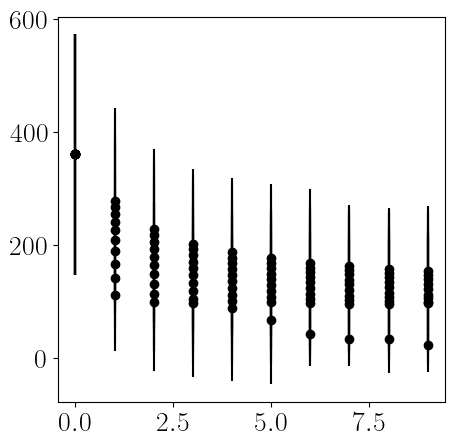

In [4]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.errorbar(df['number'], df['distance_initial_mean'], yerr=df['distance_initial_sigma_1'], fmt='o', color='black', label='Primary')
fig.show()

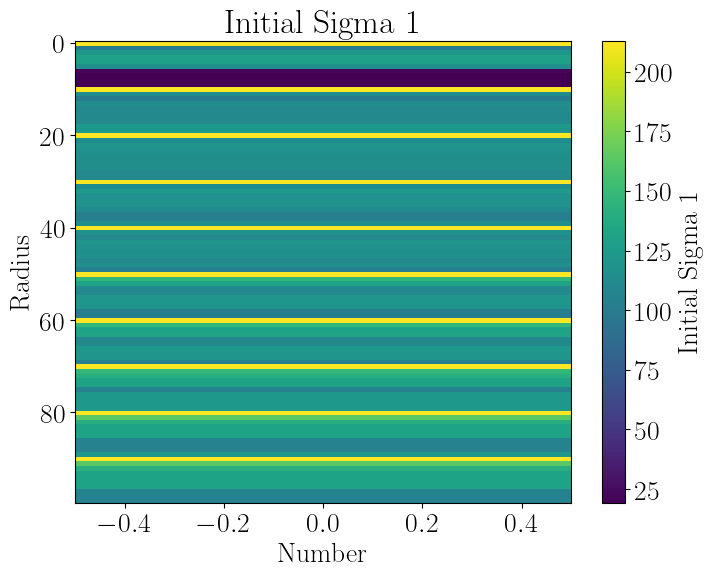

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(df['distance_initial_sigma_1'].values.reshape(-1, 1), cmap='viridis', aspect='auto')
ax.set_xlabel('Number')
ax.set_ylabel('Radius')
ax.set_title('Initial Sigma 1')
plt.colorbar(im, ax=ax, label='Initial Sigma 1')
plt.show()
